In [1]:
from letter import gxl2Graph
import json
import networkx as nx
import matplotlib.pyplot as plt
from EMD import GGMD
import numpy as np
from ggd import ggd

In [2]:
data = open('../data/PROTOTYPE/A_prototype.json')
gxl = json.load(data)
g1 = gxl2Graph(gxl, 'u')

data = open('../data/Letter/json/LOW/AP1_0011.json')
gxl = json.load(data)
g2 = gxl2Graph(gxl, 'v')

G1, G2 = g1.toNX(), g2.toNX()

In [3]:
cost, flow, D = GGMD(g2, g1, 1, 1, 1000)
for u in flow.values():
    for v, w in u.items():
        u[v] = { 'weight': w } 
F = nx.DiGraph(flow)
F.remove_node("eps1")
F.remove_node("eps2")
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w == 0])

In [4]:
c, f = ggd(g2, g1, 1, 1)
H = nx.DiGraph(f)

In [4]:
#pos1 = nx.get_node_attributes(G1,  'coords')
#pos2 = nx.get_node_attributes(G2,  'coords')

pos1 = { u.label: u.coords for u in g1.vertices }
pos2 = { u.label: u.coords for u in g2.vertices }

for k in pos2.keys():
        pos2[k] = np.add( pos2[k], (4,0))
pos = pos1 | pos2
#pos = {"eps1": (0, 3), "eps2": (0, -3)}

TypeError: 'Graph' object is not iterable

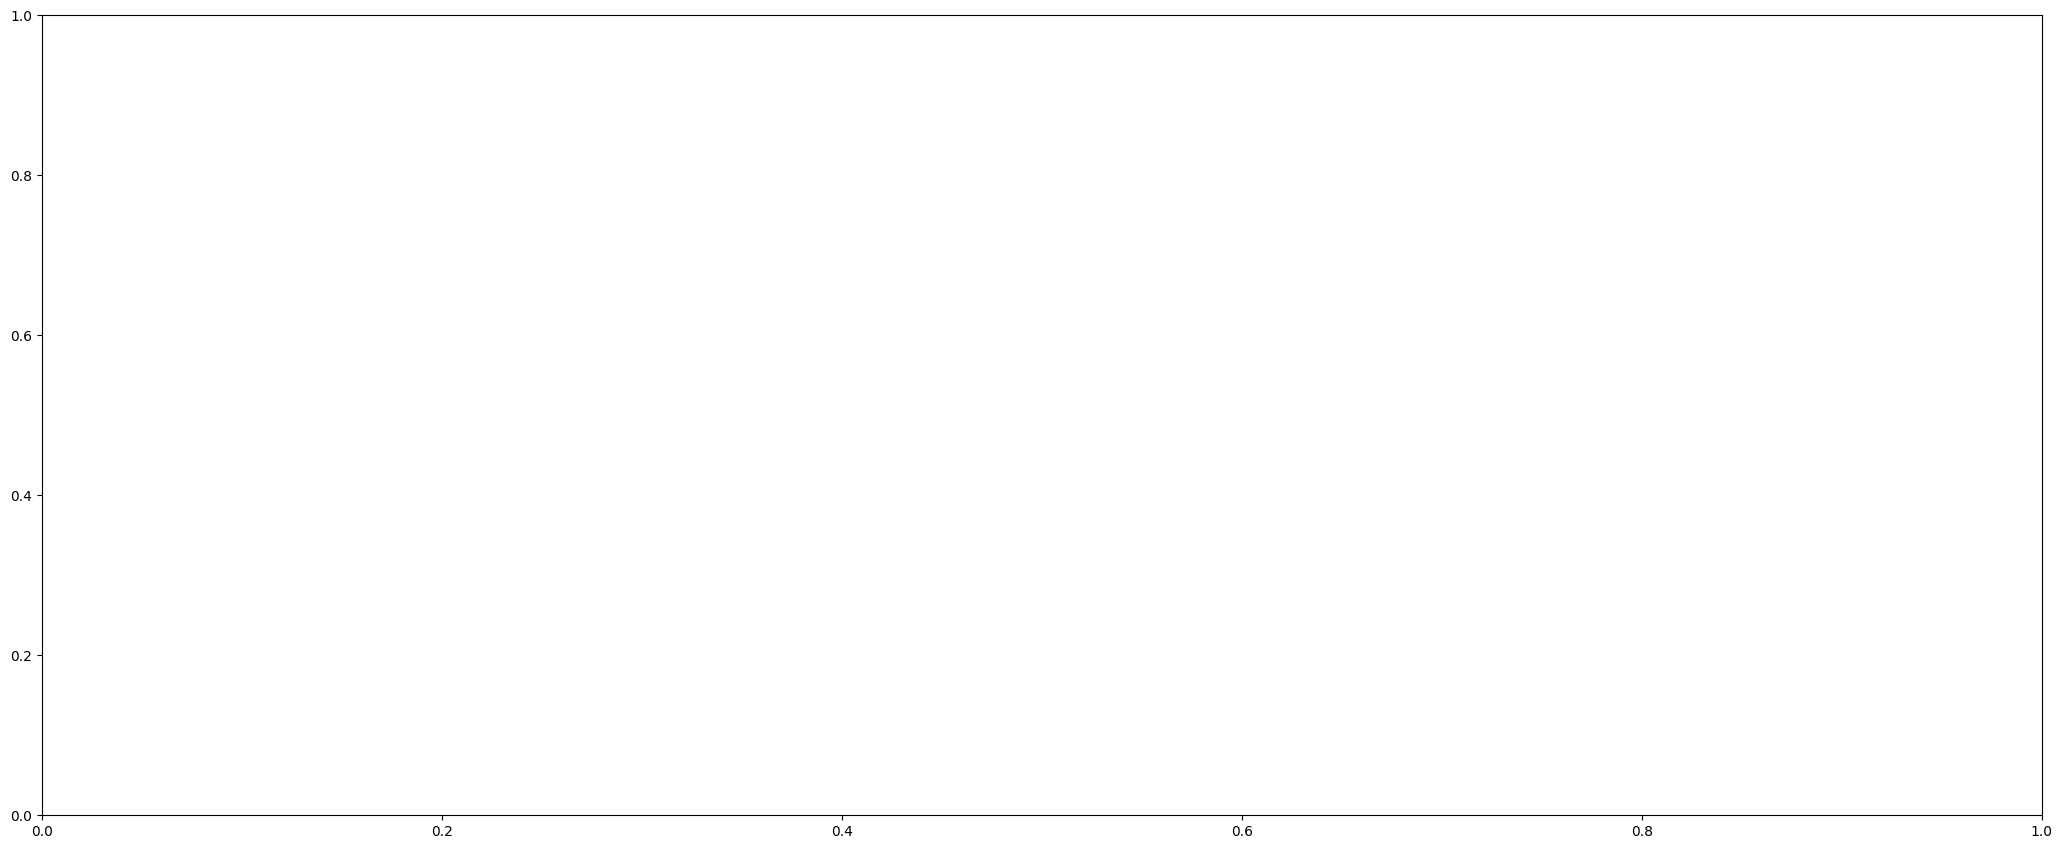

In [5]:
fig = plt.figure(figsize=(20, 8))
nx.draw(G1, pos1, edge_color = "red", node_color = "red", node_size = 20, with_labels = False)
nx.draw(G2, pos2, edge_color = "blue", node_color = "blue", node_size = 20, with_labels = False)
nx.draw(F, pos, edge_color = "gray", width = 2, style = '--', node_size = 0, alpha = 0.5, connectionstyle="arc3, rad=0.2", arrowsize = 17)

nx.draw(H, pos, edge_color = "green", width = 2, style = '--', node_size = 0, alpha = 0.5, connectionstyle="arc3, rad=0.2", arrowsize = 17)
# 
# weights = nx.get_edge_attributes(F, 'weight').values()
# nx.draw(F, pos, **options, width=list(weights))

In [4]:
c, cost

NameError: name 'c' is not defined